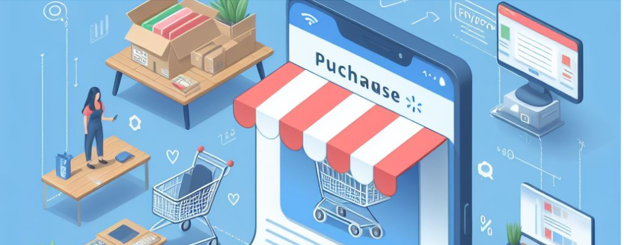

Problem Statement:

You have been provided purchase data for various customers across a vertical. You need to apply your learnings from Data Manipulation, Data Visualization, and statistical analysis to come up with actionable insights about the data.


Tasks To Be Performed:

1. Perform a Detailed EDA for the Data with inferences from each of the actions.
2. Using Statistical Analysis, find out statistical evidence for the following:
    - a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?
    - b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?
    - c. Is the average purchase made by men and women of thellge 18-25 same?
    - d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?
    - e. Is Purchase independent of Product_Category_1?

## 1.  Exploratory Data Analysis (EDA):

Steps we will follow: 

1. Data Collection
2. Data Cleant
3. Descriptive Analysis3cs
4. Univariate Analysis
5. Bivariate Analysis
6. Multivariate Analysis
7. Data Visualization
8. Feature Engineering
9. Outlier Detection
10. Missing Value Imputation
11. Dimensionality Reduction
12. Correlation Analysis

In [1]:
# Import Neccesarry Liabraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data 

data = pd.read_csv('Purchase.csv')


In [2]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [20]:
list(data.columns)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

#### label Encoding :
                        Label Encoding assigns numerical labels to categories based on their alphabetical order. For example, if you have categories like "A," "B," and "C," they might be encoded as 0, 1, and 2 respectively.




In [6]:
# import 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
# label Encoding

data['User_ID'] = le.fit_transform(data['User_ID'])

data['Product_ID'] = le.fit_transform(data['Product_ID'])

data['Gender'] = le.fit_transform(data['Gender'])

data['Age'] = le.fit_transform(data['Age'])

data['City_Category'] = le.fit_transform(data['City_Category'])

In [35]:
data['Gender'].unique() 

array([0, 1], dtype=int64)

In [36]:
print('User_ID', le.classes_)

User_ID [0 1 2]


In [37]:
print('City_Category',le.classes_)

City_Category [0 1 2]


In [40]:
data['User_ID'].unique() 

array([   0,    1,    2, ..., 4008, 5253, 1484], dtype=int64)

In [41]:


data['Stay_In_Current_City_Years'].unique()



array(['2', '4+', '3', '1', '0'], dtype=object)

In [8]:
 # changing 4+  to 4

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+' , '4')


# now we will convert datatype from object to integer using typecasting 

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)



In [9]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969


In [10]:
#  Checking fro null  values 

data.isna().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

This seams to be  big number : Generally we do not drop that big numbers ;
However we are applying statistical Analysis on this so we only need smaller sample. 


    **so we will drop  rather that data Imputation**

In [11]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int32  
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int32  
 6   Stay_In_Current_City_Years  166821 non-null  int32  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 13.4 MB


In [55]:
# descriptive stats summary 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,166821.0,2956.922258,1690.553079,0.0,1478.0,3019.0,4367.0,5890.0
Product_ID,166821.0,1471.491683,942.668323,0.0,745.0,1334.0,2106.0,3630.0
Gender,166821.0,0.774645,0.417817,0.0,1.0,1.0,1.0,1.0
Age,166821.0,2.455153,1.335119,0.0,2.0,2.0,3.0,6.0
Occupation,166821.0,8.178886,6.487522,0.0,2.0,7.0,14.0,20.0
City_Category,166821.0,1.087159,0.759824,0.0,1.0,1.0,2.0,2.0
Stay_In_Current_City_Years,166821.0,1.861690,1.284791,0.0,1.0,2.0,3.0,4.0
Marital_Status,166821.0,0.402839,0.490470,0.0,0.0,0.0,1.0,1.0
Product_Category_1,166821.0,2.742766,2.573969,1.0,1.0,1.0,4.0,15.0
Product_Category_2,166821.0,6.896871,4.500288,2.0,2.0,6.0,10.0,16.0


In [57]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,4,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,5,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,5,3598,0,5,9,0,1,0,2,3.0,4.0,13055


## Visualisation

In [59]:
# ignore warnings 

import warnings 

warnings.simplefilter(action='ignore', category=FutureWarning)


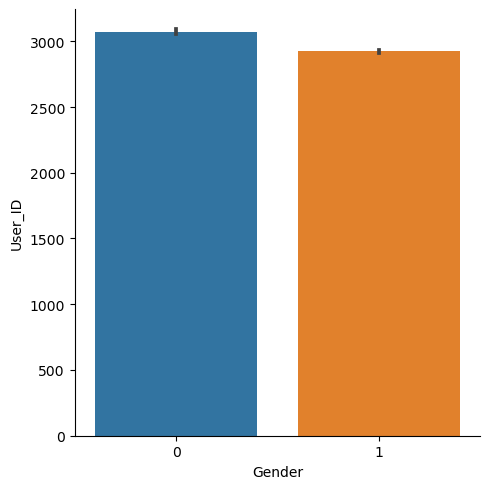

In [61]:
sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')


#  Amongst all the purshases made, majority of the purchases were made by Women/Female.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

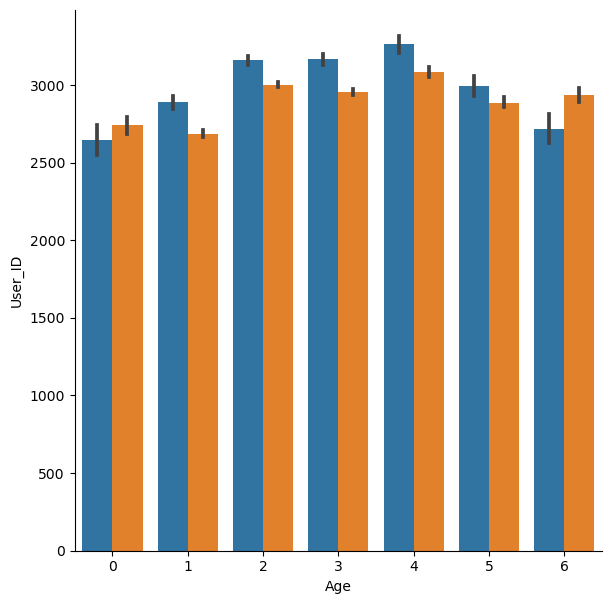

In [70]:
sns.catplot(data=data, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)



In [71]:
data['Age'].unique()

array([0, 4, 2, 5, 3, 1, 6], dtype=int64)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

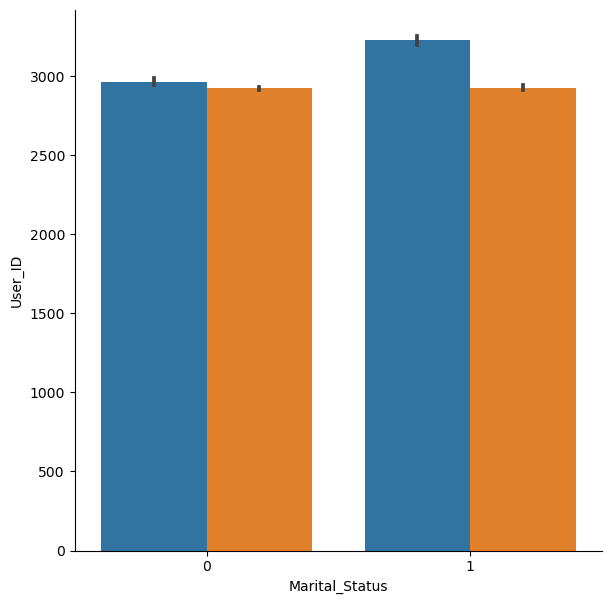

In [74]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)

In [ ]:
le.classes_

### count plot 

### checking purchages with respect to product catagories 

<Axes: xlabel='Product_Category_1', ylabel='count'>

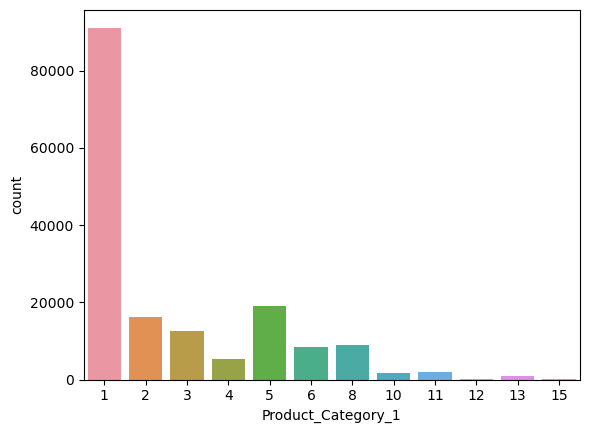

In [112]:


sns.countplot(data=data,x=data['Product_Category_1'])

In [113]:
data['Product_Category_2'].unique()

array([ 6.,  8.,  2.,  3., 14.,  5.,  4., 11., 15., 10.,  9., 13., 12.,
       16.])

<Axes: xlabel='Product_Category_2', ylabel='count'>

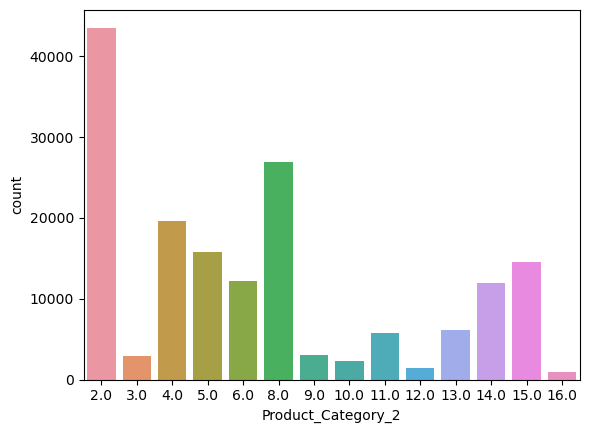

In [75]:
sns.countplot(data=data,x=data['Product_Category_2'])

<Axes: xlabel='Product_Category_3', ylabel='count'>

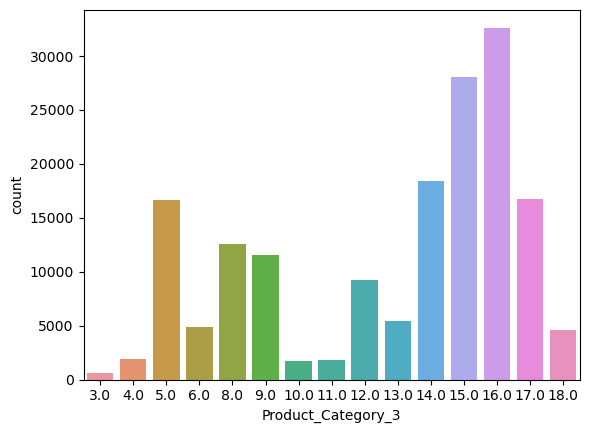

In [76]:
sns.countplot(data=data,x=data['Product_Category_3'])

In [78]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,4,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,5,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,5,3598,0,5,9,0,1,0,2,3.0,4.0,13055


### Dist Plot == talks about desity of the data .. 

C:\Users\User\AppData\Local\Temp\ipykernel_16016\3941390375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'])


<Axes: xlabel='Purchase', ylabel='Density'>

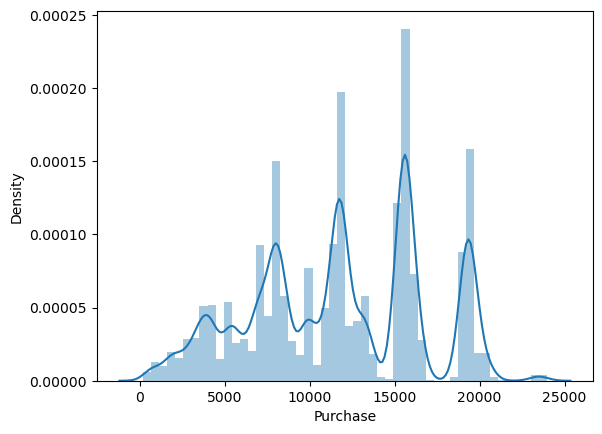

In [81]:
sns.distplot(data['Purchase'])

### data is not normally distributed Rather it varies in different intervals 

## Correlation 

In [82]:
#checking the correlation of the features

corr_spearman = data.corr(numeric_only = True)
corr_pearson = data.corr(method='pearson')
corr_kendall = data.corr(method='kendall')

In [83]:
data.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.007779,-0.036813,0.033455,-0.014515,0.018860,-0.026382,0.018669,0.010359,0.009073,0.003399,-0.000575
Product_ID,-0.007779,1.000000,0.011179,0.021203,0.006680,-0.019544,-0.001499,0.010292,0.025650,0.031936,0.026679,-0.106410
Gender,-0.036813,0.011179,1.000000,-0.005513,0.111920,-0.004953,0.010200,-0.010872,-0.076321,-0.016093,0.028069,0.060852
Age,0.033455,0.021203,-0.005513,1.000000,0.098123,0.100360,-0.008542,0.310920,0.051916,0.047871,0.057346,0.023937
Occupation,-0.014515,0.006680,0.111920,0.098123,1.000000,0.041711,0.026696,0.027368,-0.013682,0.001336,0.013263,0.025048
City_Category,0.018860,-0.019544,-0.004953,0.100360,0.041711,1.000000,0.016395,0.039678,-0.024514,-0.006612,-0.002347,0.077344
Stay_In_Current_City_Years,-0.026382,-0.001499,0.010200,-0.008542,0.026696,0.016395,1.000000,-0.014053,-0.002906,-0.000382,0.002093,0.007598
Marital_Status,0.018669,0.010292,-0.010872,0.310920,0.027368,0.039678,-0.014053,1.000000,0.015682,0.014813,0.019473,0.004603
Product_Category_1,0.010359,0.025650,-0.076321,0.051916,-0.013682,-0.024514,-0.002906,0.015682,1.000000,0.499115,0.229678,-0.396558
Product_Category_2,0.009073,0.031936,-0.016093,0.047871,0.001336,-0.006612,-0.000382,0.014813,0.499115,1.000000,0.543649,-0.153711


In [84]:
corr_spearman

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.007779,-0.036813,0.033455,-0.014515,0.018860,-0.026382,0.018669,0.010359,0.009073,0.003399,-0.000575
Product_ID,-0.007779,1.000000,0.011179,0.021203,0.006680,-0.019544,-0.001499,0.010292,0.025650,0.031936,0.026679,-0.106410
Gender,-0.036813,0.011179,1.000000,-0.005513,0.111920,-0.004953,0.010200,-0.010872,-0.076321,-0.016093,0.028069,0.060852
Age,0.033455,0.021203,-0.005513,1.000000,0.098123,0.100360,-0.008542,0.310920,0.051916,0.047871,0.057346,0.023937
Occupation,-0.014515,0.006680,0.111920,0.098123,1.000000,0.041711,0.026696,0.027368,-0.013682,0.001336,0.013263,0.025048
City_Category,0.018860,-0.019544,-0.004953,0.100360,0.041711,1.000000,0.016395,0.039678,-0.024514,-0.006612,-0.002347,0.077344
Stay_In_Current_City_Years,-0.026382,-0.001499,0.010200,-0.008542,0.026696,0.016395,1.000000,-0.014053,-0.002906,-0.000382,0.002093,0.007598
Marital_Status,0.018669,0.010292,-0.010872,0.310920,0.027368,0.039678,-0.014053,1.000000,0.015682,0.014813,0.019473,0.004603
Product_Category_1,0.010359,0.025650,-0.076321,0.051916,-0.013682,-0.024514,-0.002906,0.015682,1.000000,0.499115,0.229678,-0.396558
Product_Category_2,0.009073,0.031936,-0.016093,0.047871,0.001336,-0.006612,-0.000382,0.014813,0.499115,1.000000,0.543649,-0.153711


In [85]:
corr_pearson

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.007779,-0.036813,0.033455,-0.014515,0.018860,-0.026382,0.018669,0.010359,0.009073,0.003399,-0.000575
Product_ID,-0.007779,1.000000,0.011179,0.021203,0.006680,-0.019544,-0.001499,0.010292,0.025650,0.031936,0.026679,-0.106410
Gender,-0.036813,0.011179,1.000000,-0.005513,0.111920,-0.004953,0.010200,-0.010872,-0.076321,-0.016093,0.028069,0.060852
Age,0.033455,0.021203,-0.005513,1.000000,0.098123,0.100360,-0.008542,0.310920,0.051916,0.047871,0.057346,0.023937
Occupation,-0.014515,0.006680,0.111920,0.098123,1.000000,0.041711,0.026696,0.027368,-0.013682,0.001336,0.013263,0.025048
City_Category,0.018860,-0.019544,-0.004953,0.100360,0.041711,1.000000,0.016395,0.039678,-0.024514,-0.006612,-0.002347,0.077344
Stay_In_Current_City_Years,-0.026382,-0.001499,0.010200,-0.008542,0.026696,0.016395,1.000000,-0.014053,-0.002906,-0.000382,0.002093,0.007598
Marital_Status,0.018669,0.010292,-0.010872,0.310920,0.027368,0.039678,-0.014053,1.000000,0.015682,0.014813,0.019473,0.004603
Product_Category_1,0.010359,0.025650,-0.076321,0.051916,-0.013682,-0.024514,-0.002906,0.015682,1.000000,0.499115,0.229678,-0.396558
Product_Category_2,0.009073,0.031936,-0.016093,0.047871,0.001336,-0.006612,-0.000382,0.014813,0.499115,1.000000,0.543649,-0.153711


<Axes: >

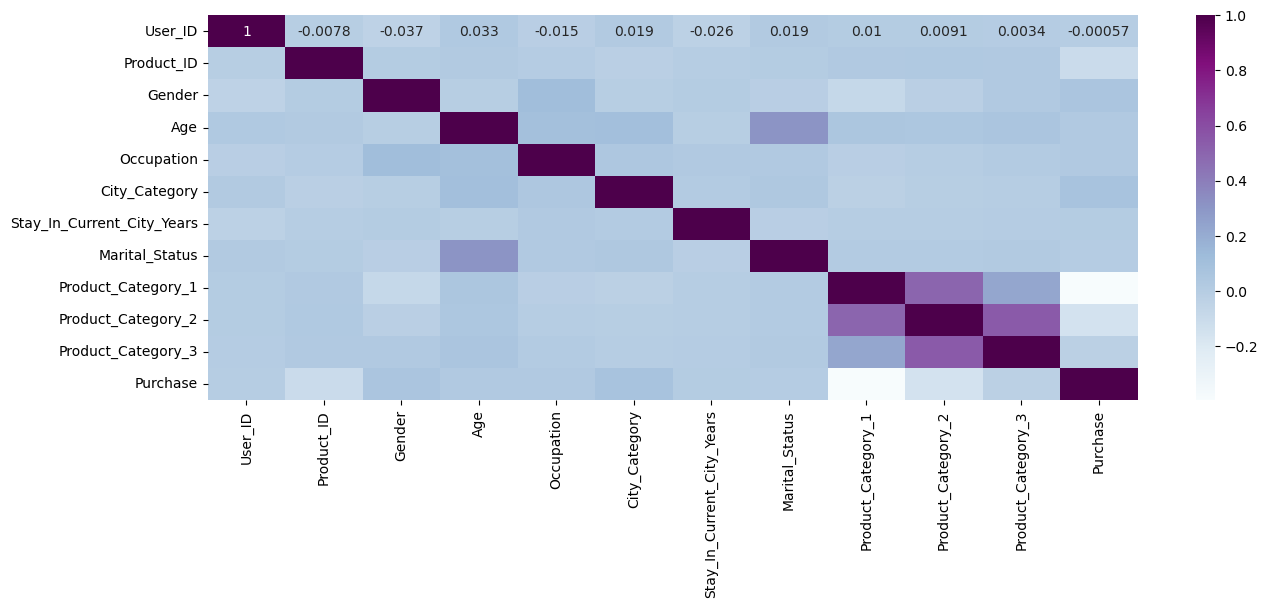

In [88]:
#spearman correlation


plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot = True, cmap='BuPu')

## 2. Statistical Analysis



| **Statistical Test**     | **Python Libraries & Functions**                               | **R Functions**                  |
|--------------------------|-----------------------------------------------------------------|----------------------------------|
| T-tests                  | `scipy.stats.ttest_1samp`, `scipy.stats.ttest_ind`, `scipy.stats.ttest_rel` | `t.test()`                       |
| ANOVA                    | `scipy.stats.f_oneway`                                          | `aov()`                          |
| Chi-squared test         | `scipy.stats.chi2_contingency`                                  | `chisq.test()`                   |
| Linear Regression        | `statsmodels.api.OLS`, `sklearn.linear_model.LinearRegression`    | `lm()`                           |
| Logistic Regression      | `statsmodels.api.Logit`, `sklearn.linear_model.LogisticRegression` | `glm()`                          |
| Correlation              | `numpy.corrcoef`, `scipy.stats.pearsonr`, `scipy.stats.spearmanr` | `cor()`, `cor.test()`            |
| Non-parametric tests     | `scipy.stats.wilcoxon`, `scipy.stats.mannwhitneyu`                 | `wilcox.test()`, `wilcox.test()` |


#### a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

Therefore assumptions : 

- null hypothesis - The mean is 10000
- alternate hypothesis - The mean is not 10000

In [12]:
new_data = data.loc[(data['Age'] == 1) & (data['Gender'] == 1)]
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,21,3370,1,1,15,0,4,0,1,8.0,17.0,12099
103,21,2507,1,1,15,0,4,0,1,11.0,16.0,12098
111,21,2150,1,1,15,0,4,0,2,4.0,15.0,9564
127,24,1957,1,1,4,2,4,0,1,5.0,9.0,15361
128,24,458,1,1,4,2,4,0,1,2.0,15.0,15770
...,...,...,...,...,...,...,...,...,...,...,...,...
545425,5814,338,1,1,5,1,1,0,1,14.0,16.0,15420
545427,5814,1832,1,1,5,1,1,0,2,3.0,4.0,15973
545428,5814,1518,1,1,5,1,1,0,2,15.0,16.0,6847
545430,5814,1538,1,1,5,1,1,0,2,4.0,5.0,13276


In [13]:
new_data.shape 


(24239, 12)

In [15]:
original_dataSet = pd.read_csv('Purchase.csv')

In [16]:
original_dataSet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
print(original_dataSet['Age'].unique())

print(original_dataSet['Gender'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['F' 'M']


In [36]:
from scipy.stats import ttest_1samp
new_data
sample_size = 1000
sample= new_data.sample(sample_size, random_state = 0)
sample_mean = sample['Purchase'].mean()
print('sample_mean : ' , sample_mean)

pop_mean = 100000
print('pop_mean: ', pop_mean)

t_stat , p_value = ttest_1samp(sample['Purchase'],pop_mean )
print('t_stat:', t_stat )
print('p_value:', p_value )

alpha =  0.05
print('alpha:', alpha )


if p_value < alpha:
    print('Reject Null Hyp, the sample mean is significantly diff')
else:
    print('Fail to Reject/ accept null Hyp ')


sample_mean :  11806.467
pop_mean:  100000
t_stat: -547.5352786176405
p_value: 0.0
alpha: 0.05
Reject Null Hyp, the sample mean is significantly diff


#### Comclusion:  P-value is less than 0.05, reject the null hypothesis. therefore, the mean purchase for men aged 18-25 is not 10000.

### Two Sample test for Means
#### Is the average purchase made by men and women of the age 18-25 same?

null hypothesis =  average purchase are equal
alternat hypothesis = average purchase are not equal



In [49]:
from scipy.stats import ttest_ind


new_men = data.loc[(data['Age'] == 1) & (data['Gender'] == 1)]
new_women  = data.loc[(data['Age'] == 1) & (data['Gender'] == 0)]

#creating samples
sample_men = new_men.sample(500, random_state = 0 )
sample_women = new_women.sample(500, random_state = 0 )



# check for varience : If we have unequal variences we go for Independent T-test
print('sample_men_varience :', sample_men['Purchase'].var() )
print('sample_women_varience :', sample_women['Purchase'].var() )



t_stats , p_value = ttest_ind(sample_men['Purchase'],sample_women['Purchase'], equal_var = False)
print('t_stat:', t_stat )
print('p_value:', p_value )


if p_value < alpha:
    print('Reject Null Hyp, the sample mean is significantly diff')
else:
    print('Fail to Reject/ accept null Hyp ')


sample_men_varience : 25667399.361122195
sample_women_varience : 25521524.106817614
t_stat: -547.5352786176405
p_value: 0.0034582632769889553
Reject Null Hyp, the sample mean is significantly diff


#### Conclusion : therefore the average purchases are not the same 

### one Sample test for Proportion
Let's Suppose, It was observed that the percentage of women that spend more than 10000 was 35%. Is it still the same?

null hypothesis = Proportion is 35%.
alternate hypothesis = Proportion is not 35%.

In [97]:
data1= data.loc[(data['Purchase'] > 10000)]
# we can't extract only women data because we need to compare it with men so that we can  get the prportion 

from statsmodels.stats.proportion import proportions_ztest


# from proportion z test we need count, nobs , observed value 
# therefore 

# count of women in the data: 
count = data1['Gender'].value_counts()[0]
print('count:' , count)

# number of obersevation: entire length of the gender column 
nobs = len(data1['Gender'])
print('nobs:', nobs)

# hypothesis value/observed p value 
p0 = 0.35

z_stats , p_value = proportions_ztest(count= count,
                                     nobs =nobs,
                                     value = p0,
                                     alternative = 'two-sided',
                                     prop_var = False) # as  we  do not have variance  
print('z_stats:', z_stats )
print('p_value:', p_value )   

if p_value < alpha:
    print('Reject Null Hyp, the sample mean is significantly diff')
else:
    print('Fail to Reject/ accept null Hyp ')

count: 21124
nobs: 102477
z_stats: -113.84729816907917
p_value: 0.0
Reject Null Hyp, the sample mean is significantly diff


In [98]:
data1['Gender'].value_counts()[0]

21124

In [99]:
data1['Gender'].value_counts()

Gender
1    81353
0    21124
Name: count, dtype: int64



### Two Sample test for Proportion
Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35

In [101]:
# since we have  to calculate the percentage we will go with Ztest for proportion 

data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase']> 10000)]


data_age1_sample = data_age1.sample(1000, random_state = 0)
data_age2_sample = data_age2.sample(1000, random_state = 0)

count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]
print('count:' , count)

nobs = [(len(data_age1_sample)), (len(data_age2_sample))]
print('nobs:' , nobs)


from statsmodels.stats.proportion import proportions_ztest


zstats, p_value = proportions_ztest(count = count,
                                   nobs = nobs, 
                                   value = 0,
                                   alternative= 'two-sided',
                                   prop_var = False)

print('z_stats:', z_stats )
print('p_value:', p_value )   

if p_value < alpha:
    print('Reject Null Hyp, the sample mean is significantly diff')
else:
    print('Fail to Reject/ accept null Hyp ')

count: [789, 816]
nobs: [1000, 1000]
z_stats: -113.84729816907917
p_value: 0.12939272225896914
Fail to Reject/ accept null Hyp 


 p value is more than 0.05, cannot reject the null hypthesis.
 
 therefore, Percentage of the men in the age groups is same